Shape of the data: (303, 15)
   Unnamed: 0  age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0   63    male   3     145.0  233.0    1        0    150.0      0   
1           1   37    male   2     130.0  250.0    0        1    187.0      0   
2           2   41  female   1     130.0  204.0    0        0    172.0      0   
3           3   56    male   1     120.0  236.0    0        1    178.0      0   
4           4   57  female   0       NaN  354.0    0        1    163.0      1   

   oldpeak  slope  ca  thal target  
0      2.3      0   0     1    yes  
1      3.5      0   0     2    yes  
2      1.4      2   0     2    yes  
3      0.8      2   0     2    yes  
4      0.6      2   0     2    yes  
Target Value Counts:
target
yes    165
no     138
Name: count, dtype: int64


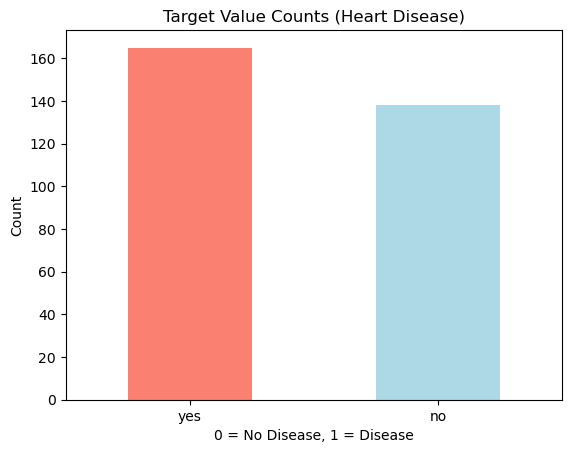

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB
None
       Unnamed: 0         age          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  299.00

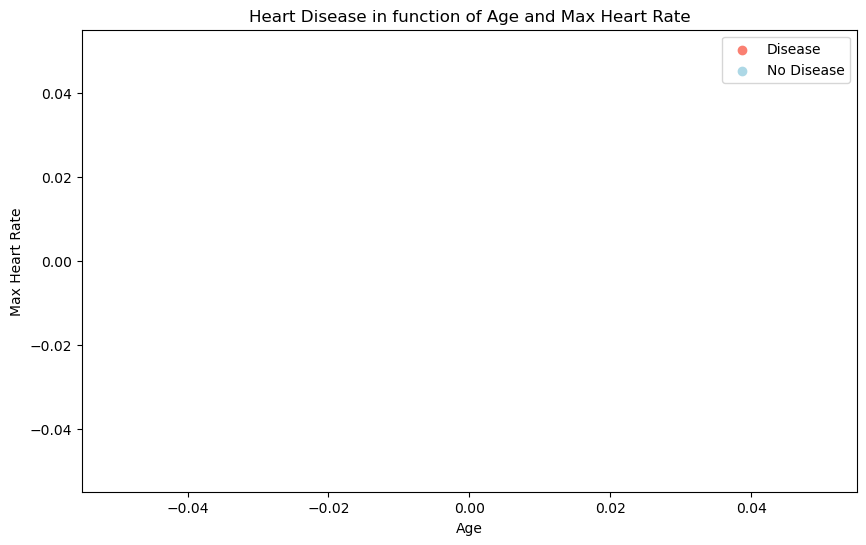

ValueError: could not convert string to float: 'yes'

In [9]:
import numpy as np  # np is short for numpy
import pandas as pd  # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("heart disease classification dataset.csv")

# Data overview
print(f"Shape of the data: {df.shape}")
print(df.head())

# Checking the target value distribution
print(f"Target Value Counts:\n{df.target.value_counts()}")
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Target Value Counts (Heart Disease)")
plt.ylabel("Count")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.xticks(rotation=0)
plt.show()

# Data info and basic statistics
print(df.info())
print(df.describe())

# Value counts for 'sex' column
print(f"Sex Value Counts:\n{df.sex.value_counts()}")

# Handle categorical data (e.g., 'sex', 'cp') with Label Encoding
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
df['sex'] = label_encoder.fit_transform(df['sex'])
df['cp'] = label_encoder.fit_transform(df['cp'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['exang'] = label_encoder.fit_transform(df['exang'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])

# Check if all columns are numeric now
print(df.info())

# Visualizing relationships (age vs thalach)
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon", label="Disease")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue", label="No Disease")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

# Correlation matrix - Select only numeric columns
corr_matrix = df.corr()
print(corr_matrix)

# Plot the heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Prepare features (X) and target (y)
X = df.drop(columns="target")  # Features
y = df["target"]  # Target variable

# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Function to fit models and get scores
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Fit and evaluate models
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
print(f"Model Accuracy Scores:\n{model_scores}")

# Plot model accuracy comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# Hyperparameter tuning for KNN
train_scores = []
test_scores = []
neighbors = range(1, 21)  # 1 to 20 neighbors
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Plot KNN performance
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.legend()
plt.show()

print(f"Maximum KNN accuracy on test data: {max(test_scores) * 100:.2f}%")

# Hyperparameter tuning for Logistic Regression using RandomizedSearchCV
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(X_train, y_train)
print(f"Best Logistic Regression Parameters: {rs_log_reg.best_params_}")
print(f"Logistic Regression Test Score: {rs_log_reg.score(X_test, y_test)}")

# Hyperparameter tuning for Random Forest using RandomizedSearchCV
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rs_rf.best_params_}")
print(f"Random Forest Test Score: {rs_rf.score(X_test, y_test)}")

# GridSearchCV for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(X_train, y_train)
print(f"Best Logistic Regression Parameters (GridSearch): {gs_log_reg.best_params_}")
print(f"Logistic Regression Test Score (GridSearch): {gs_log_reg.score(X_test, y_test)}")
